# Hands-On Research #2

# Working with Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.image_ops_utils import *

%matplotlib inline

/Users/michelleguo/PycharmProjects/stanford-ai4all-vision/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Section I: Images and Matrices

First we'll learn about how computers store **images** in **matrices** (or **arrays**). We'll look at images of different shapes and try to understand the difference between color and grayscale images.

### Matrix Shape

All images, matrices, and arrays have a **shape**. If our image is in black and white, its shape can be described with two numbers: The number of **rows**, and the number of **columns** of **pixel-values**. Every **pixel-value** is a number between 0. and 1. that tells us how light or dark that part of the image is.

For example, if an image has _r_ rows, and _c_ columns, the image's shape is "_r_ by _c_", or (r, c).

Run the next cell to see a set of matrix images, and guess what their shape is:

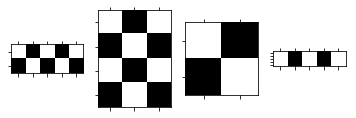

In [2]:
display_all_rectangles()

Check if your guesses are right by filling out the "check_shape" function.

**Hint:** You will need to use the numpy command **np.shape()**.

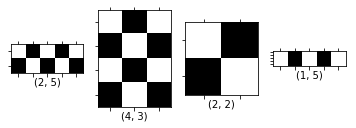

In [5]:
def check_shape():
    """
    Get the shapes of x0, x1, x2, x3, and store them in the variables
    shape_of_x0, shape_of_x1, shape_of_x2, shape_of_x3.
    """
    x0 = rect_0
    x1 = rect_1
    x2 = rect_2
    x3 = rect_3
    
    ## YOUR CODE HERE
    shape_of_x0 = np.shape(x0)
    shape_of_x1 = np.shape(x1)
    shape_of_x2 = np.shape(x2)
    shape_of_x3 = np.shape(x3)
    ## END YOUR CODE
    
    display_all_rectangles(shapes = [shape_of_x0, shape_of_x1,
                                     shape_of_x2, shape_of_x3])
    
check_shape()

### The Shape of Color Images

So far we've just looked at the shape of matrices for black and white images. Color images also have a shape, but they require a new dimension to store information about the colors. Every color image has three **Color Channels**.

Can you guess the shape of a color image with 32 rows and 32 columns? Run the function in the next cell to find out:

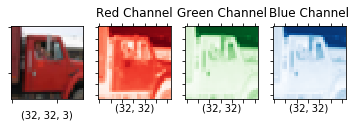

In [6]:
display_color_image_and_shape()

You can think of the color image as being each channel "stacked" one on top of another.

Notice that the the red channel has the most intense color around the body of the truck, but the green and blue channels are very light there.

## Section II: Manipulating Images

We now have a pretty good idea of how computers use **matrices** to represent **images**. Next, we'll learn ways to transform images and making new ones.

### Concatenation

The process of sticking arrays together end-to-end is called **concatenation**, and it can be done with the command **np.concatenate()**. Many arrays can be concatenated at once by placing them in a _list_. Try fixing the "how_to_concatenate" function below to see how it works.

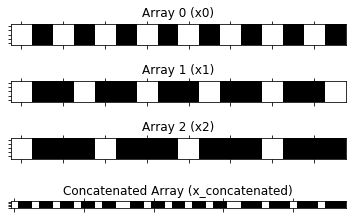

In [7]:
def how_to_concatenate():
    # These are the arrays we want to concatenate together
    x0 = array_0
    x1 = array_1
    x2 = array_2

    x_concatenated = None
    ## YOUR CODE |HERE
    x_concatenated = np.concatenate([x1, x1, x2])
    ## END YOUR CODE
    
    display_arrays([x0,x1,x2, x_concatenated])
    
how_to_concatenate()

We can also concatenate rectangular matrices, or images, but the rules become more complicated. We need to decide which ** axis ** they should be concatenated along. In other words, do we put matrices together side by side, or one on top of another?

Try experimenting with the axis argument to **np.concatenate()** in the function below. Can you describe the difference between having **axis=0** and **axis=1**?

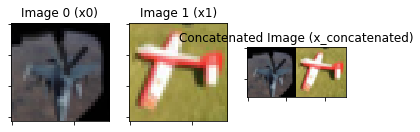

In [9]:
def concatenate_images():
    data = load_planes_data()
    x0 = data[10]
    x1 = data[20]
    
    x_concatenated = None
    ## YOUR CODE HERE
    x_concatenated = np.concatenate([x0, x1], axis=1)
    ## END YOUR CODE
    display_images([x0, x1, x_concatenated])
    
concatenate_images()

### Slicing Rows and Columns

Images can be cut into pieces along their different axes by providing a **range** of numbers as an "index". To get all the values along an axis, you can use a semicolon. For example, if X is an image you can get the 0th row of pixels and assign it to the variable _row_ with: **row = X[0,:]**.

Try fixing the function "how_to_slice" to pull out the "interesting column" in the middle of the image, and displaying it by itself. Make sure to run "how_to_slice" before editing it, to see how the original image looks.

**Hint:** Don't forget to store the sliced column in the variable **col**.


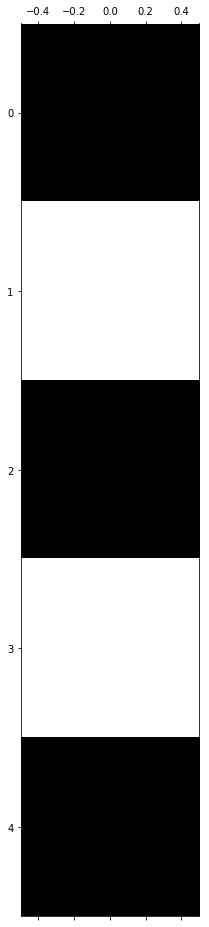

In [11]:
def how_to_slice():
    x = rect_w_col
    col = x.copy()
    ## YOUR CODE HERE
    col = x[:, 3]
    ## END YOUR CODE
    display_array(col, column=True)
    
how_to_slice()

### Slicing Color Channels

You can also slice along the third axis (where the color channels are stored) and change them to make the images different colors.

Try slicing the different copies of the images to make them different colors.

** Hint 1: ** You can set all the pixels in a slice equal to 0. by using the assignment operator (=). For example, X[0,:] = 0. will set the 0th row of X to be all 0's.

**Hint 2: **

_xr_ should be _red_

_xg_ should be _green_

_xb_ should be _blue_

_xp_ should be _purple_ (only red and blue colors)

_xy_ should be _yellow_ (only green and red colors)

_xt_ should be _turqoise_ (only blue and green colors)

**Note : **
It's fine if the plane in the middle is a darker shade than the rest.

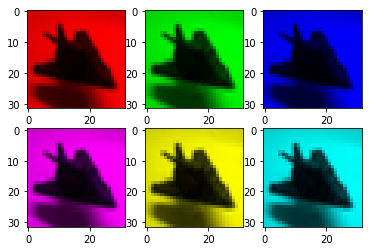

In [13]:
# NOTE: Should the plane thing in the middle still be green or blue or whatever color? Maybe it's 
# worth clarifying that keeping this original color is fine.
def how_to_slice_color_channels():
    data = load_planes_data()

    xr = data[0].copy() # red
    xg = data[0].copy() # green
    xb = data[0].copy() # blue

    xp = data[0].copy() # purple
    xy = data[0].copy() # yellow
    xt = data[0].copy() # turqoise

    # YOUR CODE HERE
    xr[:, :, 1] = 0
    xr[:, :, 2] = 0
    
    xg[:, :, 0] = 0
    xg[:, :, 2] = 0
    
    xb[:, :, 0] = 0
    xb[:, :, 1] = 0
    
    xp[:, :, 1] = 0
    xy[:, :, 2] = 0
    xt[:, :, 0] = 0
    # END YOUR CODE
    display_images_in_grid(xr, xg, xb, xp, xy, xt)
    
how_to_slice_color_channels()

## Section III: Putting it all Together

Finally, lets use our understanding of **slicing** and **concatenation** to merge two different images together. We've provided grayscale images (so rows and columns, but no third axis) of two different faces. Run the block below to see them separately:


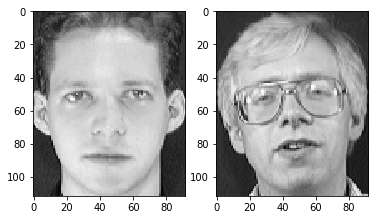

In [14]:
def show_faces():
    X = load_faces_data()
    X = 1. - X
    face0 = X[0]
    face1 = X[1]
    
    f, axs = plt.subplots(1,2)
    axs[0].imshow(face0, cmap="Greys")
    axs[1].imshow(face1, cmap="Greys")
    
    plt.show()

show_faces()

Try slicing one half of **face_0** and one half of **face_1** and merge them together using concatenate. You can experiment with merging them horizontally and vertically.

In [23]:
def merge_horizontally(face0, face1):
    two_face = face1.copy()
    #YOUR CODE HERE
    # Hint: we've already copied face1 into `two_face`, so all you need to do is modify a slice of `two_face`
    img_shape = two_face.shape
    two_face[:img_shape[0]//2, :] = face0[:img_shape[0]//2, :]
    # END YOUR CODE
    plt.imshow(two_face, cmap="Greys")
    plt.show()

In [32]:
def merge_vertically(face0, face1):
    two_face = face1.copy()
    #YOUR CODE HERE
    # Hint: we've already copied face1 into `two_face`, so all you need to do is modify a slice of `two_face`
    img_shape = two_face.shape
    two_face[:, :img_shape[1]//2] = face0[:, :img_shape[1]//2]
    # END YOUR CODE
    plt.imshow(two_face, cmap="Greys")
    plt.show()

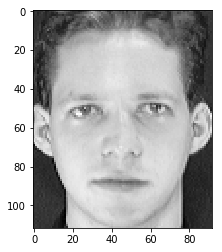

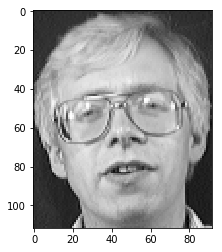

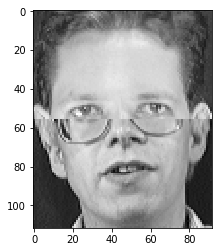

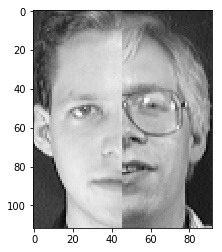

In [33]:
def how_to_slice_and_concatenate():
    X = load_faces_data()
    X = 1. - X
    face0 = X[0]
    face1 = X[1]
    
    plt.imshow(face0, cmap="Greys")
    plt.show()
    plt.imshow(face1, cmap="Greys")
    plt.show()
    
    merge_horizontally(face0, face1)
    
    merge_vertically(face0, face1)
    
how_to_slice_and_concatenate()